## Pymaceutical Analysis  
Febuary 22, 2019  
Scott McEachern

In [1]:
#- Import Libraries
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import numpy as np
import os

In [2]:
#-- Load Datasets into DataFrame
# Mouse Data
mouseDataPath = os.path.join(".", "Resources", "mouse_drug_data.csv")

mouse_df = pd.read_csv(mouseDataPath)


# Trail Data
trailDataPath = os.path.join(".", "Resources", "clinicaltrial_Data.csv")

trail_df = pd.read_csv(trailDataPath)

In [3]:
#-- Create Single Dataset
#  Combine the data based on the mouse ID
trailWithMouse_df = pd.merge(trail_df, mouse_df, how='left', on=["Mouse ID", "Mouse ID"])

#- Preview Data
trailWithMouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [4]:
#-- Calculate Tumor Volumne Mean and Standard Error
#  Groups the data by drug and then loops through these groups of drugs and then groups by timepoint to 
#  Calculate the mean and standard error

#- Prepare Dictionary to store results
tumorResponseMeanData = {
    'Drug': [],
    'Timepoint': [],
    'Tumor Volume (mm3)': []
    }

tumorResponseErrData = {
    'Drug': [],
    'Timepoint': [],
    'Tumor Volume (mm3)': []
    }


#- Group By Drug
dataGroupedByDrug_dfGroupBy = trailWithMouse_df.groupby('Drug')


#- Calculate Results
for drugName, groupedDrug_df in dataGroupedByDrug_dfGroupBy:
    
    # Group by Timepoint
    dataGroupedByTime_dfGroupBy = groupedDrug_df.groupby('Timepoint')
    
    # Calculate Results for each timepoint
    for timePoint, groupedTime_df in dataGroupedByTime_dfGroupBy:
        
        # Set Name
        tumorResponseMeanData['Drug'].append(drugName)
        tumorResponseErrData['Drug'].append(drugName)
        
        # Timepoint
        tumorResponseMeanData['Timepoint'].append(timePoint)
        tumorResponseErrData['Timepoint'].append(timePoint)
        
        # Average
        tumorResponseMeanData['Tumor Volume (mm3)'].append(groupedTime_df['Tumor Volume (mm3)'].mean())
    
        # Standard Error
        tumorResponseErrData['Tumor Volume (mm3)'].append(groupedTime_df['Tumor Volume (mm3)'].sem())

       
#- Create DataFrames
tumorResponseMean_df = pd.DataFrame(tumorResponseMeanData)

tumorResponseErr_df = pd.DataFrame(tumorResponseErrData)
 
                                                                             
#- Preview Mean Tumor Volume Data                                                                            
tumorResponseMean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
#- Preview Standard Error Tumor Volume Data
tumorResponseErr_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [6]:
def reformatDataFrameForChart(response_df, measureColumnName):
    ''' Creates a new DataFrame using the information in the dataframe provided
    
    Accepts : response_df (DataFrame) source DataFrame that has the following columns
                'Drug', 'Timepoint', 'Tumor Volume (mm3)'
              measureColumnName (str) name of the column within the dataframe
    
    Returns : DataFrame that has a column for each drug; first column is timepoint
    '''
    
    #- Group by Drug
    responseGroupedByDrug_dgGroupBy = response_df.groupby('Drug')


    #- Create Dictionary with Data
    reformatData = {
        }
    isFirstGroup = True

    for drugName, meanGroup_df in responseGroupedByDrug_dgGroupBy:

        # Add Timepoint to the dictionary of results; only do this for the first drug
        if (isFirstGroup == True):

            reformatData['Timepoint'] = meanGroup_df['Timepoint'].tolist()

            isFirstGroup = False

        # Add Mean to dictionary of resuts
        reformatData[drugName] = meanGroup_df[measureColumnName].tolist()


    #- Create DataFrame
    responseFormat_df = pd.DataFrame(reformatData) 
    
    
    return responseFormat_df
    

In [7]:
#-- Reformat Mean DataFrame

#- Create New DataFrame
tumorResponseMeanFormat_df = reformatDataFrameForChart(tumorResponseMean_df, 'Tumor Volume (mm3)')


#- Preview Dataframe
tumorResponseMeanFormat_df.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
#-- Reformat Standard Error

tumorResponseErrFormat_df = reformatDataFrameForChart(tumorResponseErr_df, 'Tumor Volume (mm3)')

#- Preview DataFrame
tumorResponseErrFormat_df.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


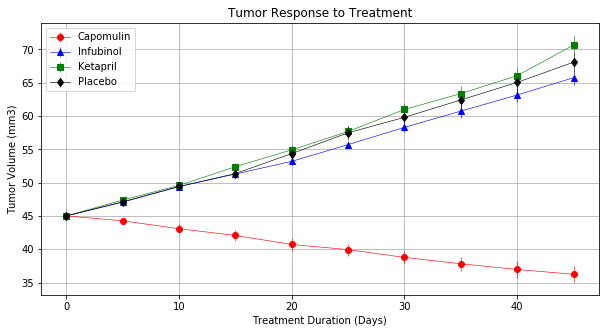

In [9]:
#-- Plot: Tumor Response to Treatment

#- Prepare Chart Appearance
chartAppearance = {
    'Drug' : ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],
    'Symbol' : ['o', '^', 's', 'd'],
    'Color' : ['red', 'blue', 'green', 'black']
    }


#- Create Chart
plt.figure(figsize = (10, 5))

for counter in range(len(chartAppearance['Drug'])):
    
    # Create Bar for each drug in study
    plt.errorbar(x=tumorResponseMeanFormat_df['Timepoint'], 
                 y=tumorResponseMeanFormat_df[chartAppearance['Drug'][counter]], 
                 yerr=tumorResponseErrFormat_df[chartAppearance['Drug'][counter]],
                 linestyle="-",
                 linewidth=0.6,
                 color= chartAppearance['Color'][counter],
                 fmt=chartAppearance['Symbol'][counter])


#- Set Chart Metadata
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Duration (Days)')
plt.grid()
plt.legend()


#- Save Chart
responseToTreatmentImagePath = os.path.join(".", "Images", "TumorResponseToTreatment.png")

plt.savefig(responseToTreatmentImagePath)


#- Show Chart
plt.show()

In [10]:
#-- Calculate Tumor Metastatic Mean and Standard Error
# Using the grouped by drug dataframe, group again for the timepoint and create 
# a new dataframe for both the mean and standard error

#- Prepare Dictionary to store results
tumorMetastaticMeanData = {
    'Drug': [],
    'Timepoint': [],
    'Metastatic Sites': []
    }

tumorMetastaticErrData = {
    'Drug': [],
    'Timepoint': [],
    'Metastatic Sites': []
    }


#- Calculate Results
for drugName, groupedDrug_df in dataGroupedByDrug_dfGroupBy:
    
    # Group by Timepoint
    dataGroupedByTime_dfGroupBy = groupedDrug_df.groupby('Timepoint')
    
    # Calculate Results for each timepoint
    for timePoint, groupedTime_df in dataGroupedByTime_dfGroupBy:
        
        # Set Name
        tumorMetastaticMeanData['Drug'].append(drugName)
        tumorMetastaticErrData['Drug'].append(drugName)
        
        # Timepoint
        tumorMetastaticMeanData['Timepoint'].append(timePoint)
        tumorMetastaticErrData['Timepoint'].append(timePoint)
        
        # Average
        tumorMetastaticMeanData['Metastatic Sites'].append(groupedTime_df['Metastatic Sites'].mean())
    
        # Standard Error
        tumorMetastaticErrData['Metastatic Sites'].append(groupedTime_df['Metastatic Sites'].sem())

       
#- Create DataFrames
tumorMetastaticMean_df = pd.DataFrame(tumorMetastaticMeanData)

tumorMetastaticErr_df = pd.DataFrame(tumorMetastaticErrData)
 
                                                                             
#- Preview Mean Metastatic Sites Data                                                                            
tumorMetastaticMean_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [11]:
#- Preview Standard Error Metastatic Sites Data
tumorMetastaticErr_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [12]:
#-- Reformat Metastatic Mean DataFrame

#- Create New DataFrame
tumorMetastaticMeanFormat_df = reformatDataFrameForChart(tumorMetastaticMean_df, 'Metastatic Sites')

#- Preview DataFrame
tumorMetastaticMeanFormat_df.head(10)

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


In [13]:
#-- Reformat Metastatic Standard Error DataFrame

#- Create New DataFrame
tumorMetastaticErrFormat_df = reformatDataFrameForChart(tumorMetastaticErr_df, 'Metastatic Sites')

#- Preview DataFrame
tumorMetastaticErrFormat_df.head(10)

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
5,25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
6,30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
7,35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
8,40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791
9,45,0.202591,0.286101,0.309320,0.278722,0.351104,0.304240,0.428571,0.190221,0.359062,0.286400


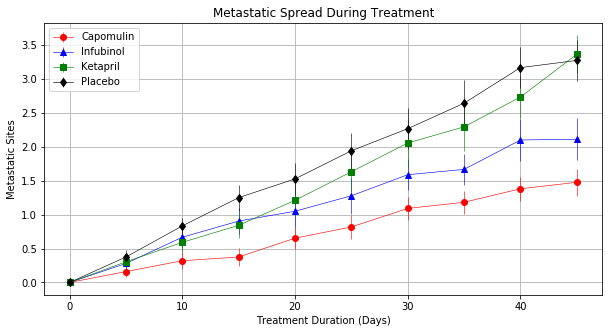

In [14]:
#-- Plot: Metastatic Spread During Treatment

#- Create Chart
plt.figure(figsize = (10, 5))

for counter in range(len(chartAppearance['Drug'])):
    
    # Create Bar for each drug in study
    plt.errorbar(x=tumorMetastaticMeanFormat_df['Timepoint'], 
                 y=tumorMetastaticMeanFormat_df[chartAppearance['Drug'][counter]], 
                 yerr=tumorMetastaticErrFormat_df[chartAppearance['Drug'][counter]],
                 linestyle="-",
                 linewidth=0.6,
                 color= chartAppearance['Color'][counter],
                 fmt=chartAppearance['Symbol'][counter])


#- Set Chart Metadata
plt.title('Metastatic Spread During Treatment')
plt.ylabel('Metastatic Sites')
plt.xlabel('Treatment Duration (Days)')
plt.grid()
plt.legend()


#- Save Chart
metastaticSpreadImagePath = os.path.join(".", "Images", "MetastaticSpreadDuringTreatment.png")

plt.savefig(metastaticSpreadImagePath)


#- Show Chart
plt.show()

In [15]:
#-- Calculate Mouse Survival
# Using the grouped by drug dataframe, group again for the timepoint and count the number of 
# mouse that are still alive

#- Prepare Dictionary to store results
survivalData = {
    'Drug': [],
    'Timepoint': [],
    'Mouse Count': []
    }


#- Calculate Results
for drugName, groupedDrug_df in dataGroupedByDrug_dfGroupBy:
    
    # Group by Timepoint
    dataGroupedByTime_dfGroupBy = groupedDrug_df.groupby('Timepoint')
    
    # Calculate Results for each timepoint
    for timePoint, groupedTime_df in dataGroupedByTime_dfGroupBy:
        
        # Set Name
        survivalData['Drug'].append(drugName)
        
        # Timepoint
        survivalData['Timepoint'].append(timePoint)
        
        # Count
        survivalData['Mouse Count'].append(groupedTime_df['Drug'].count())
    

#- Create DataFrame
survival_df = pd.DataFrame(survivalData)


#- Preview Survival
survival_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
#-- Reformat Survival DataFrame

#- Create New DataFrame
survivalFormat_df = reformatDataFrameForChart(survival_df, 'Mouse Count')

#- Preview DataFrame
survivalFormat_df.head(10)

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


In [17]:
#- Calculate Survival Rate
#  First timepoint has the number of mouse that used the drug

#- Get Unique List of Drugs
uniqueDrugNames = trailWithMouse_df['Drug'].unique()


#- Create Dictionary for results
survivalRateData = {
    'Timepoint': survivalFormat_df['Timepoint']
    }


#- Determine Survival Rate for each drug
for drugName in uniqueDrugNames:
    
    # Start Mouse Count
    startMouseCount = survivalFormat_df[drugName].iloc[0]
    
    # Calculate Surval Rate
    survivalRateData[drugName] = survivalFormat_df[drugName] / startMouseCount * 100


#- Create DateFrame
survivalRate_df = pd.DataFrame(survivalRateData)


#- Preview Survival Rate
survivalRate_df.head()

,Timepoint,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
0,0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0,100.0,100.0
1,5,100.0,92.0,92.0,100.0,96.153846,100.0,96.153846,96.0,96.0,84.0
2,10,100.0,88.0,84.0,84.0,88.461538,96.0,88.461538,88.0,96.0,80.0
3,15,96.0,76.0,84.0,84.0,88.461538,96.0,65.384615,84.0,80.0,76.0
4,20,92.0,76.0,80.0,80.0,80.769231,92.0,65.384615,68.0,76.0,72.0


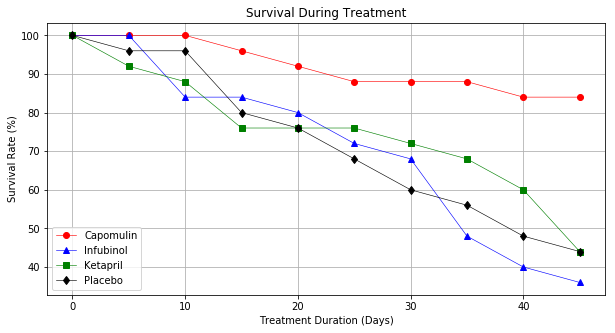

In [18]:
#-- Plot: Survival During Treatment

#- Create Chart
plt.figure(figsize = (10, 5))

for counter in range(len(chartAppearance['Drug'])):
    
    # Create Bar for each drug in study
    plt.errorbar(x=survivalRate_df['Timepoint'], 
                 y=survivalRate_df[chartAppearance['Drug'][counter]], 
                 yerr=None,
                 linestyle="-",
                 linewidth=0.6,
                 color= chartAppearance['Color'][counter],
                 fmt=chartAppearance['Symbol'][counter])


#- Set Chart Metadata
plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Treatment Duration (Days)')
plt.grid()
plt.legend(loc='lower left')


#- Save Chart
survivalDuringTreatmentImagePath = os.path.join(".", "Images", "SurvivalDuringTreatment.png")

plt.savefig(survivalDuringTreatmentImagePath)


#- Show Chart
plt.show()

In [20]:
#-- Calculate Volume Change
# Determine the percentage of the volumne change over the 45 day study period; only do this for 
# those drugs used in analysis

#- Calculate Change
percentageChangeData = []

for drugName in chartAppearance['Drug']:
    
    #- Get Start Size
    startSize = tumorResponseMeanFormat_df[drugName].iloc[0]
    
    #- Get End Size
    endSize = tumorResponseMeanFormat_df[drugName].iloc[-1]
    
    #- Calculate Percent Changed
    percentageChangeData.append(((endSize/startSize) - 1) * 100)
    

#- Create DataFrame
percentChanged_df = pd.DataFrame({
    'Drug': chartAppearance['Drug'],
    'Percent Changed': percentageChangeData
    })
    
    
#- Preview DataFrame
percentChanged_df.head()

,Drug,Percent Changed
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


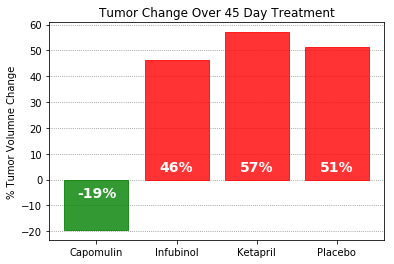

In [21]:
#-- Plot: Tumor Change Over 45 Day Treatment

#- Create Chart
fig, ax = plt.subplots()

rects = ax.bar(percentChanged_df['Drug'], percentChanged_df['Percent Changed'], alpha=0.8)


#- Prepare Font Properties; for percentage labels
fontProp = FontProperties()
fontProp.set_weight('bold')
fontProp.set_size(14)


#- Set Percentage Labels
# rect is an individual bar; the height is the percentage value
for rect in rects:
    
    # Get Height; percentage of change
    barHeight = rect.get_height()
    
    # Determine Label to display
    barLabelValue = f"{'{:,.0f}'.format(barHeight)}%"
    
    # Determine Label Y Location and set color
    yLabelLocation = 2
    
    if (barHeight > 0):
        rect.set_color('r')        
        yLabelLocation = 2
        
    else:
        rect.set_color('g')        
        yLabelLocation = -8
        
    # Add Label to Chart
    ax.text(rect.get_x() + rect.get_width()/2., yLabelLocation, 
            barLabelValue, ha='center', va='bottom', color='w', 
            fontproperties=fontProp )


#- Add Grid Lines
# Ensure Below bars
ax.set_axisbelow(True)

# Only display y Axis
ax.yaxis.grid(color='gray', linestyle=':')
    

#- Update Chart Metadata
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volumne Change')


#- Save Chart
changeOverTreatmentImagePath = os.path.join(".", "Images", "TumorChangeOverTreatment.png")

plt.savefig(changeOverTreatmentImagePath)


#- Show Chart
plt.show()